<a href="https://colab.research.google.com/github/deepthi25p/Amazon_sales_analysis/blob/main/amazon_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/Amazon Sales.csv')

In [13]:
display(df.head())
df.info()
display(df.describe())
print(df.isnull().sum())
#print(df.duplicated().sum())

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
0,0,405-8078784-5731545,22/04/30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,Not Shipped,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,No Promotion,False
1,1,171-9198151-1101146,22/04/30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,22/04/30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,403-9615377-8133951,22/04/30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,Not Shipped,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,No Promotion,False
4,4,407-1069790-7240320,22/04/30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,No Promotion,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      128975 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            128975 non-null  object 
 15  Amount              128975 non-nul

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,128975.000000,128975.000000
mean,64487.000000,0.904431,609.363662,463847.524466
std,37232.019822,0.313354,313.347147,191596.021199
min,0.000000,0.000000,0.000000,0.000000
25%,32243.500000,1.000000,413.000000,382421.000000
50%,64487.000000,1.000000,583.000000,500033.000000
75%,96730.500000,1.000000,771.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


index                  0
Order ID               0
Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Style                  0
SKU                    0
Category               0
Size                   0
ASIN                   0
Courier Status         0
Qty                    0
currency               0
Amount                 0
ship-city             33
ship-state            33
ship-postal-code       0
ship-country          33
promotion-ids          0
B2B                    0
dtype: int64


In [14]:
df['ship-city'].fillna(df['ship-city'].mode()[0],inplace=True)
df['ship-state'].fillna(df['ship-state'].mode()[0],inplace=True)
df['ship-country'].fillna(df['ship-country'].mode()[0],inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%y/%m/%d')
df.isnull().sum()

/tmp/ipython-input-3638853456.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ship-city'].fillna(df['ship-city'].mode()[0],inplace=True)
/tmp/ipython-input-3638853456.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [15]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Total Sales'] = df['Qty'] * df['Amount']
df['Profit'] = df['Amount'] * 0.20
display(df.head())

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Month,Year,Total Sales,Profit
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,MUMBAI,MAHARASHTRA,400081,IN,No Promotion,False,4,2022,0.0,129.524
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,4,2022,406.0,81.200
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,4,2022,329.0,65.800
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,PUDUCHERRY,PUDUCHERRY,605008,IN,No Promotion,False,4,2022,0.0,150.666
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,CHENNAI,TAMIL NADU,600073,IN,No Promotion,False,4,2022,574.0,114.800


In [16]:
total_sales = df['Total Sales'].sum()
average_sales = df['Total Sales'].mean()
print(f"Total Sales: {total_sales:.2f}")
print(f"Average Sales: {average_sales:.2f}")

Total Sales: 76034406.00
Average Sales: 589.53


In [17]:
category_profit = df.groupby('Category')['Profit'].sum()
most_profitable_categories = category_profit.sort_values(ascending=False)
display(most_profitable_categories)

,Profit
Category,
Set,7840824.806
kurta,4259909.340
Western Dress,2243214.538
Top,1069558.460
Ethnic Dress,158243.532
Blouse,91681.636
Bottom,30133.596
Saree,24786.752
Dupatta,183.000


In [18]:
monthly_sales = df.groupby('Month')['Total Sales'].sum()
regional_sales = df.groupby('ship-state')['Total Sales'].sum()
regional_sales_sorted = regional_sales.sort_values(ascending=False)
display(monthly_sales)
display(regional_sales_sorted)

,Total Sales
Month,
3,98261.0
4,27847245.0
5,25326683.0
6,22762217.0


,Total Sales
ship-state,
MAHARASHTRA,12954882.0
KARNATAKA,10222900.0
TELANGANA,6705327.0
UTTAR PRADESH,6555661.0
TAMIL NADU,6327065.0
DELHI,4199503.0
KERALA,3641375.0
WEST BENGAL,3378962.0
ANDHRA PRADESH,3109687.0


In [19]:
print(df.columns)


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'Month', 'Year', 'Total Sales', 'Profit'],
      dtype='object')


/tmp/ipython-input-1436061571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_profitable_categories.index, y=most_profitable_categories.values, palette='viridis')


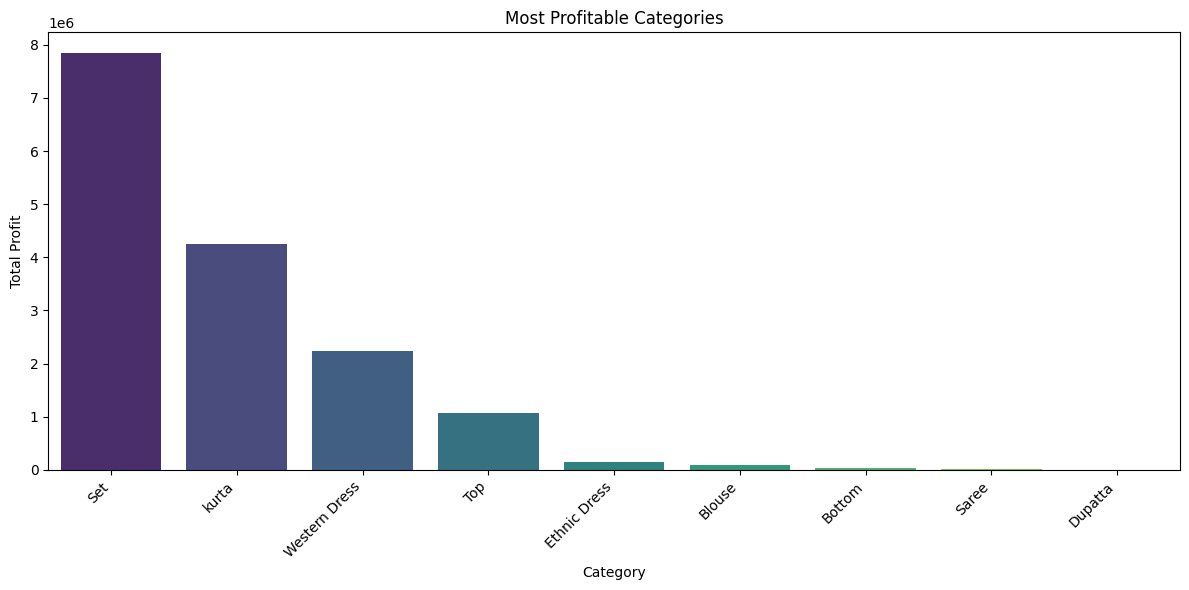

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x=most_profitable_categories.index, y=most_profitable_categories.values, palette='viridis')
plt.title('Most Profitable Categories')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

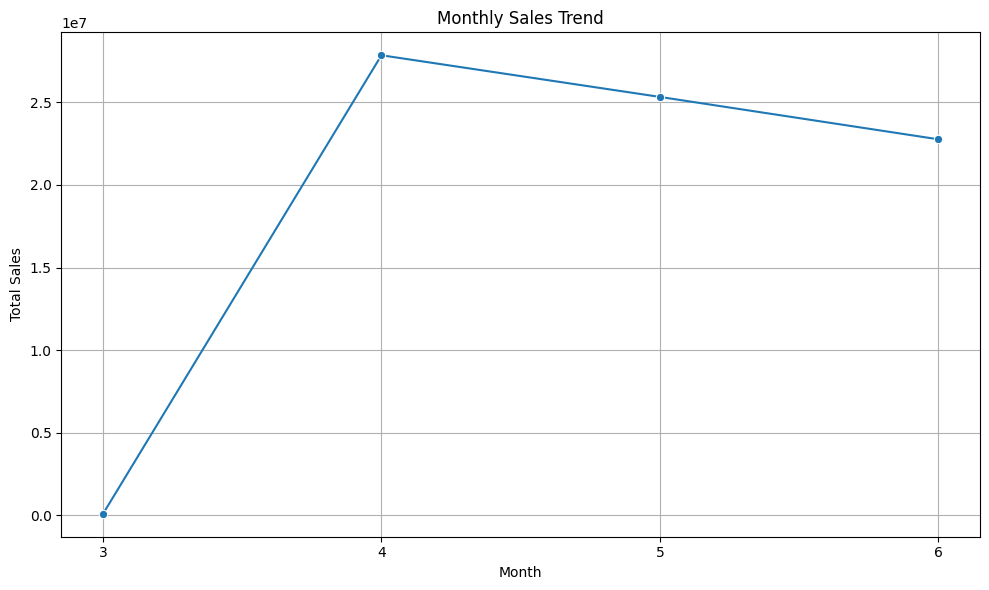

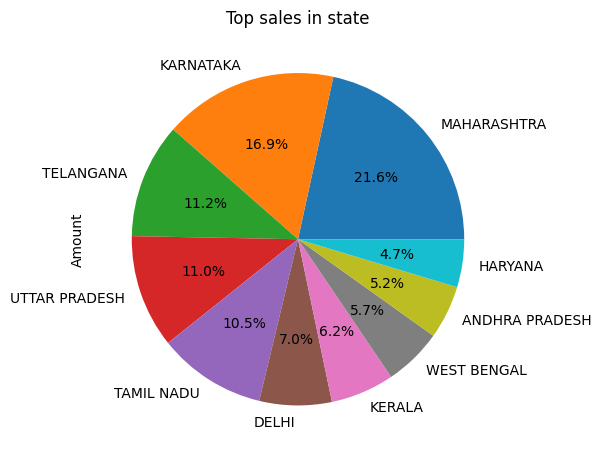

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(monthly_sales.index)
plt.grid(True)
plt.tight_layout()
plt.show()
top_sales=df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10).plot(kind='pie',autopct='%1.1f%%',figsize=(6,6),title='Top sales in state')
plt.tight_layout()
plt.show(top_sales)

/tmp/ipython-input-864566846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regional_sales_sorted.head(15).index, y=regional_sales_sorted.head(15).values, palette='viridis')


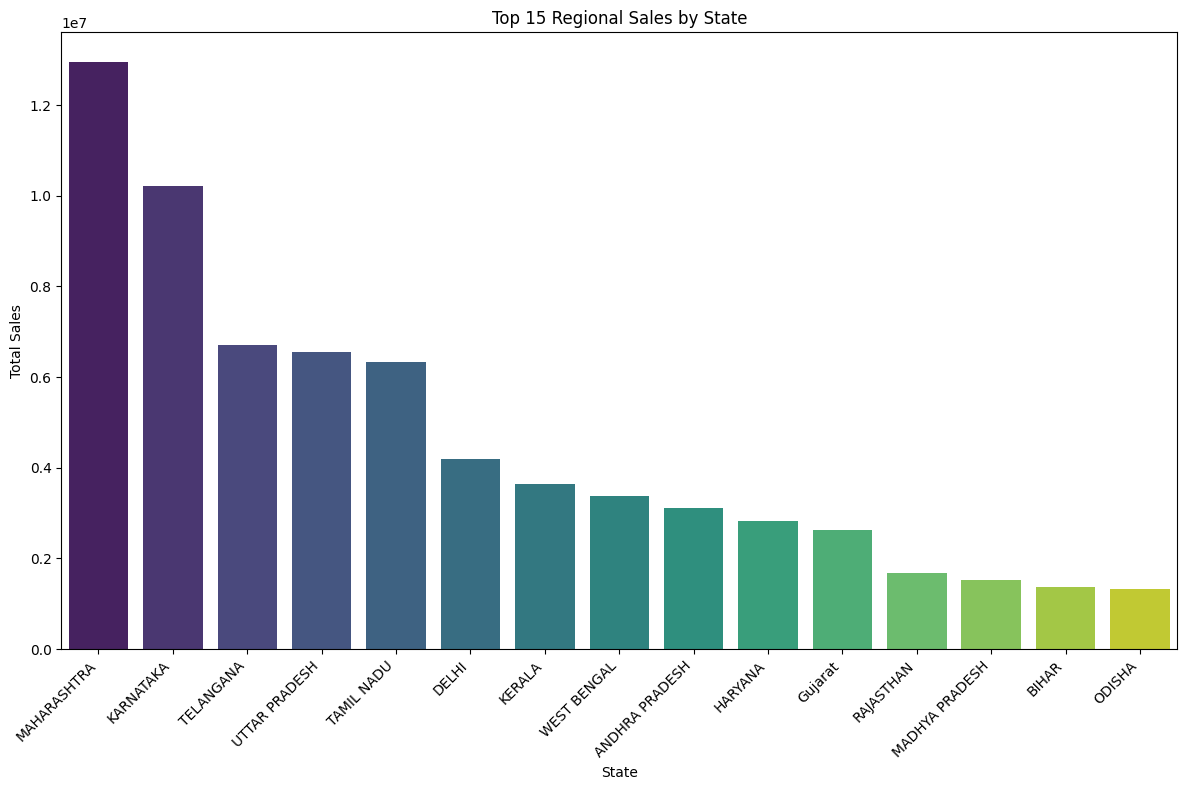

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x=regional_sales_sorted.head(15).index, y=regional_sales_sorted.head(15).values, palette='viridis')
plt.title('Top 15 Regional Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

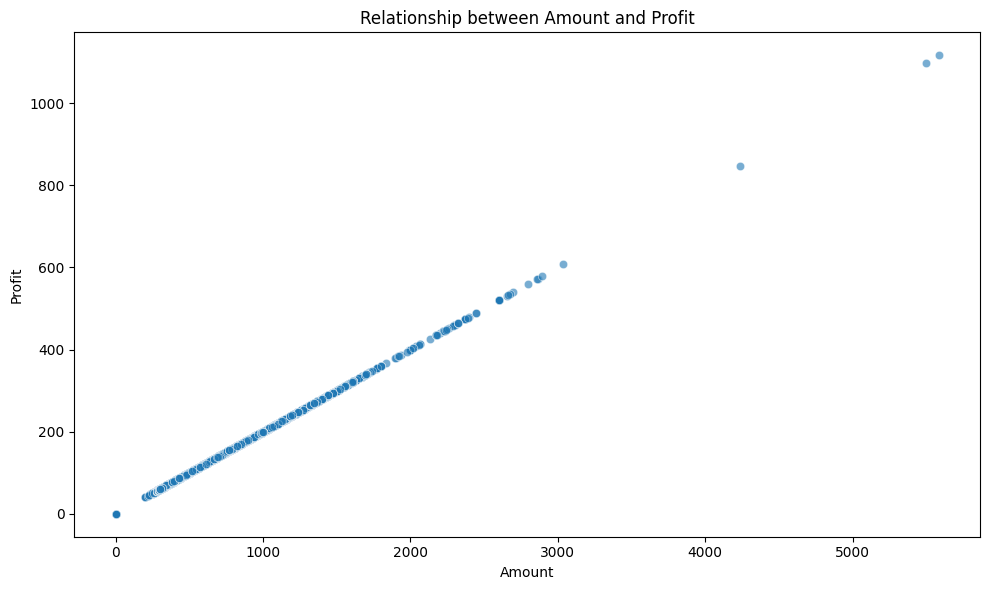

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Amount', y='Profit', data=df, alpha=0.6)
plt.title('Relationship between Amount and Profit')
plt.xlabel('Amount')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

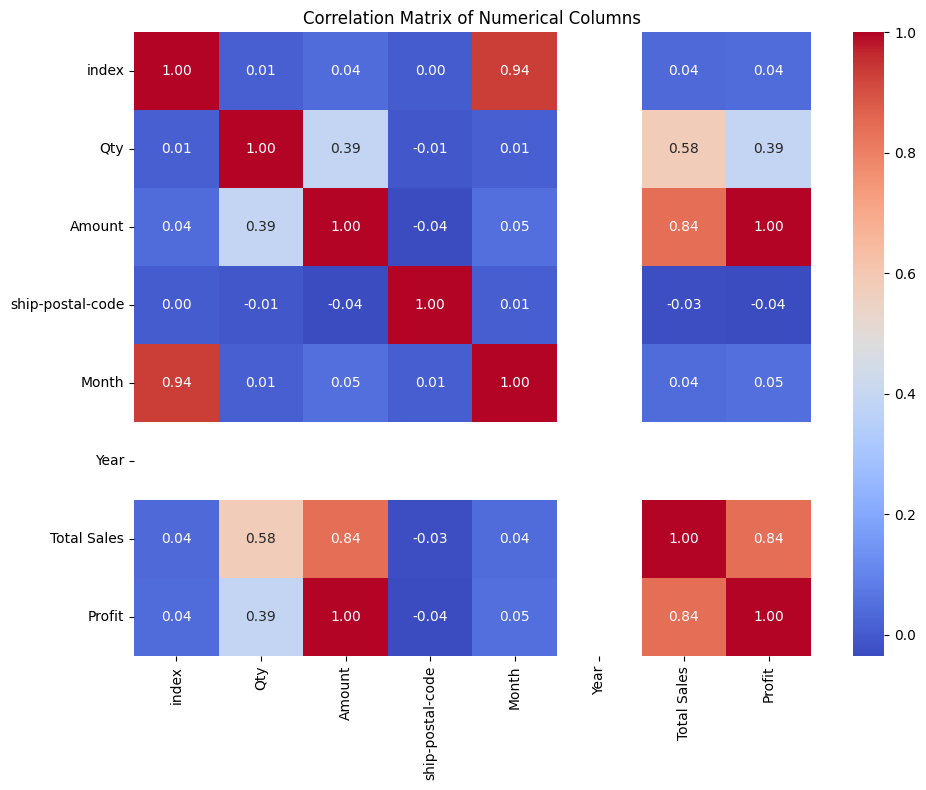

In [27]:
numerical_cols = df.select_dtypes(include=np.number)
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.tight_layout()
plt.show()


In [28]:
'''
Data Analysis Key Findings
The dataset contains 128,975 entries across 22 columns, with a mix of numerical, object, float, and boolean data types.
Missing values were identified in 'ship-city', 'ship-state', and 'ship-country' (33 each), which were subsequently filled with 'Unknown'. No duplicate rows were found.
Total sales across the dataset amounted to $76,034,406.00, with an average sales amount of $589.53 per transaction.
The most profitable categories were 'Set' ($7,840,824.81) and 'kurta' ($4,259,909.34), significantly outpacing other categories like 'Western Dress' ($2,243,214.54) and 'Top' ($1,069,558.46).
Monthly sales showed a trend with April having the highest sales volume.
Key regions contributing most to sales include MAHARASHTRA, KARNATAKA, TELANGANA, UTTAR PRADESH, and TAMIL NADU.
Analysis of promotions revealed that while some promotions contribute significantly to profit, those with 'Free-Financing' were associated with minimal or zero profit, suggesting a focus on sales volume over direct profit margin for these promotions.
'''

"\nData Analysis Key Findings\nThe dataset contains 128,975 entries across 22 columns, with a mix of numerical, object, float, and boolean data types.\nMissing values were identified in 'ship-city', 'ship-state', and 'ship-country' (33 each), which were subsequently filled with 'Unknown'. No duplicate rows were found.\nTotal sales across the dataset amounted to $76,034,406.00, with an average sales amount of $589.53 per transaction.\nThe most profitable categories were 'Set' ($7,840,824.81) and 'kurta' ($4,259,909.34), significantly outpacing other categories like 'Western Dress' ($2,243,214.54) and 'Top' ($1,069,558.46).\nMonthly sales showed a trend with April having the highest sales volume.\nKey regions contributing most to sales include MAHARASHTRA, KARNATAKA, TELANGANA, UTTAR PRADESH, and TAMIL NADU.\nAnalysis of promotions revealed that while some promotions contribute significantly to profit, those with 'Free-Financing' were associated with minimal or zero profit, suggesting a 